In [1]:
import pandas as pd

from pathlib import Path

In [2]:
# Initial imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import model_from_json

import matplotlib.pyplot as plt

#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [3]:
## Load pickle for exports and imports of data  
import pickle 
def load_obj(path):
    with open(path, 'rb') as f:
        return pickle.load(f)
    
def save_obj(obj, path ):
    with open(path, 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [4]:
## Create function to return dataframe based off symbol and if shift or no shift 
## Default to no shift 
def return_dataframe(symbol,shift=False):
    if shift == False:
        path = Path('../FilesExport_DFs_with_TI_pkl/'+symbol+'_data_dict_with_technicals.pkl')
        data_import = load_obj(path)
        df = data_import[symbol].copy()
    elif shift == True:
        path = Path('../FilesExport_DFs_with_TI_shifted/'+symbol+'_df_with_shifted_TI.pkl')
        data_import = load_obj(path)
        df = data_import[symbol].copy()
        
    return df 

In [5]:
## Import symbol list 
path = Path('../Resources/short_list_for_ML.pkl')
key_list = load_obj(path)
len(key_list)

379

In [6]:
length_ = 143
test_list = key_list[0:length_]
test_list[length_-1]

'FXO'

In [7]:
# import_df = return_dataframe('GME',shift=False)
# import_df

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,...,ShortVolumeNSDQ,ShortExemptVolumeNSDQ,TotalVolumeNSDQ,ShortVolumeNYSE,ShortExemptVolumeNYSE,TotalVolumeNYSE,bollinger_signal,dema_signal,adl_signal,rsi_signal
Date,,,,,,,,,,,,,,,,,,,,,
2016-02-02,26.629999,26.709999,25.590000,25.920000,20.004274,1840600.0,1840600.0,-0.71,-2.666,26.07333,...,117857.0,152.0,277309.0,11326.0,0.0,34626.0,0.698895,0.610354,-0.933333,0.181443
2016-02-03,26.110001,26.280001,24.750000,26.170000,20.197214,2223400.0,2223400.0,0.06,0.230,25.73333,...,212359.0,14.0,523222.0,9575.0,0.0,26571.0,0.721685,0.662125,-0.933333,0.251546
2016-02-04,26.059999,27.190001,25.379999,27.010000,20.845501,2000200.0,2000200.0,0.95,3.645,26.52667,...,156570.0,0.0,325811.0,17331.0,0.0,35015.0,0.594613,0.774523,-0.950000,0.666667
2016-02-05,27.010000,27.180000,26.430000,26.830000,20.706583,1545800.0,1545800.0,-0.18,-0.666,26.81333,...,115038.0,0.0,215572.0,6611.0,0.0,14960.0,0.621547,0.805177,-0.950000,0.531271
2016-02-08,26.549999,27.959999,26.500000,27.889999,21.524656,2944800.0,2944800.0,1.34,5.047,27.45000,...,257398.0,30.0,496626.0,27972.0,0.0,66574.0,0.492403,0.867847,-0.933333,0.793127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-25,169.420000,174.800000,167.260000,173.970000,173.970000,1449036.0,1449036.0,4.55,2.686,172.01000,...,224603.0,6814.0,371983.0,55031.0,748.0,114748.0,0.693370,0.253406,0.300000,0.513402
2021-10-26,173.360000,185.000000,172.500000,177.840000,177.840000,2171711.0,2171711.0,4.48,2.584,178.44667,...,338831.0,4819.0,600800.0,75546.0,966.0,167756.0,0.462707,0.393052,0.633333,0.602749
2021-10-27,180.000000,183.000000,172.340000,173.510000,173.510000,1113458.0,1113458.0,-6.49,-3.606,176.28333,...,164158.0,3233.0,292965.0,34396.0,238.0,84514.0,0.484116,0.117166,0.883333,0.449485


In [8]:
## Load non-shifted data 
def get_no_shift_model(symbol):
    
    df = return_dataframe(symbol,shift=False)

    ## Set X and y data 
    X = df.drop(columns={'close','adjClose'}).values
    y = df['close'].values

    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)

    # load json and create model
    file_path = Path('../Model_Data_low_loss/'+symbol+'_model_data.json')
    with open(file_path, "r") as json_file:
        model_json = json_file.read()
    loaded_model = model_from_json(model_json)

    # load weights into new model
    file_path = Path('../Model_Data_low_loss/'+symbol+'_model_weights.h5')
    loaded_model.load_weights(file_path)

    ## Compile loaded model and print mse score 
    loaded_model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])
    
    return loaded_model, df , X , y

In [9]:
#noshift_model, df , X , y = get_no_shift_model(test_list[2])

In [10]:
# score = noshift_model.evaluate(X, y, verbose=0)
# score[0]
# print("%s: %.2f%%" % (noshift_model.metrics_names[1], score[1]*100))
# print()

# ## take dataframe copy and compare predicted values to actual values 
# df2 = df.copy()
# df2['predicted'] = noshift_model.predict(X)
# df_pred = df2[['close','predicted']]
# df_pred

In [11]:
## Load non-shifted data 
def get_with_shift_model(symbol):
    
    df = return_dataframe(symbol,shift=True)

    ## Set X and y data 
    X = df.drop(columns={'close'}).values
    y = df['close'].values

    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)

    # load json and create model
    file_path = Path('../Model_Data_shift_low_loss/'+symbol+'_model_data.json')
    with open(file_path, "r") as json_file:
        model_json = json_file.read()
    loaded_model = model_from_json(model_json)

    # load weights into new model
    file_path = Path('../Model_Data_shift_low_loss/'+symbol+'_model_weights.h5')
    loaded_model.load_weights(file_path)

    ## Compile loaded model and print mse score 
    loaded_model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])
    
    return loaded_model, df , X , y

In [12]:
# shift_model, df , X , y = get_with_shift_model(test_list[2])
# score = shift_model.evaluate(X, y, verbose=0)
# score[0]

In [13]:
model_dict_info = {} 
#dataframe_dict = {}

def evaluate_models(symbol):
    noshift_model, df , X , y = get_no_shift_model(symbol)
    shift_model, df_shift , X_shift , y_shift = get_with_shift_model(symbol)
    noshift_score_ = noshift_model.evaluate(X, y, verbose=0)
    noshift_score = noshift_score_[0]
    shift_score_ = shift_model.evaluate(X_shift, y_shift, verbose=0)
    shift_score = shift_score_[0]
    
    if shift_score < noshift_score:
        model_dict_info[symbol] = {
            'model_type' : 'shift',
            'acc' : shift_score
        }
        #dataframe_dict[symbol] = df_shift
    else:
        model_dict_info[symbol] = {
            'model_type' : 'no_shift',
            'acc' : noshift_score
        }
        #dataframe_dict[symbol] = df

In [14]:
model_dict_info = {} 
for key in test_list:
    evaluate_models(key)
len(model_dict_info)

143

In [15]:
model_info_df = pd.DataFrame.from_dict(model_dict_info, orient='index')
#model_dataframe.reset_index(inplace=True)
model_info_df.sort_values('acc',inplace=True)  ## Most accurate models come first 
#model_dataframe.reset_index(inplace=True,drop=True)
model_info_df

,model_type,acc
EUO,no_shift,2.867345e-04
BCLI,no_shift,3.124870e-03
AMSC,shift,3.275977e-03
AEZS,no_shift,5.173338e-03
CKPT,no_shift,5.933577e-03
...,...,...
ACOR,shift,2.932165e+01
DIA,shift,4.472363e+01
BEEM,shift,6.273642e+01
FBRX,shift,2.086767e+03


In [16]:
#model_info_df.loc['BEST'].model_type

'no_shift'

In [22]:
## Do predicitions 
def return_predictions_df(symbol):
    model_type = model_info_df.loc[symbol].model_type
    if model_type == 'shift':
        loaded_model, df , X , Y = get_with_shift_model(symbol)
    elif model_type == 'no_shift':
        loaded_model, df , X , y = get_no_shift_model(symbol)
      
    df['predicted'] = loaded_model.predict(X)
    df_pred = df[['close','predicted']]
    return df_pred

In [42]:
model_info_df.head()
#model_info_df.iloc[8:18]

,model_type,acc
EUO,no_shift,0.000287
BCLI,no_shift,0.003125
AMSC,shift,0.003276
AEZS,no_shift,0.005173
CKPT,no_shift,0.005934


            close  predicted
Date                        
2016-02-02  11.51  11.495229
2016-02-03  11.45  11.403912
2016-02-04  11.58  11.521088
2016-02-05  11.39  11.394916
2016-02-08  10.74  10.713008
...           ...        ...
2021-10-25  10.85  10.822298
2021-10-26  10.64  10.927960
2021-10-27  10.74  11.150421
2021-10-28  10.69  10.623803
2021-10-29  10.55  10.699562

[1448 rows x 2 columns]




<AxesSubplot:xlabel='Date'>

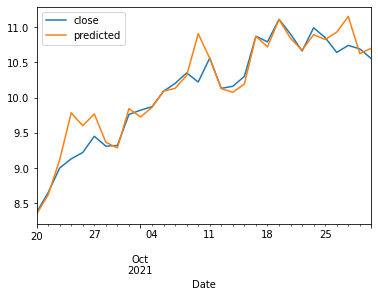

In [41]:
## Interesting Stocks - AEZS ,  
interesting_list = ['AEZS','CTIB','EURN']
test_df = predictions_df('EURN')
print(test_df)
print()
print()
## Plot 
## Slice last 100 days 
test_df2 = test_df.tail(30)
test_df2.plot()